# Tutorial on Wasserstein Flow Matching

Thank you for your interest in our work! Here we present a tutorial on how to run WFM for point-cloud generation.

In [ ]:
import jax
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from wassersteinflowmatching.wasserstein import WassersteinFlowMatching

# Load Point Clouds

ShapeNet data can be downloaded from https://github.com/nv-tlabs/LION. Here we present generation based on airplane samples.

In [3]:
shape = 'airplane'

In [ ]:
pc_train = np.load(f'data/pc_train_{shape}.npy')
pc_test = np.load(f'data/pc_test_{shape}.npy')

Total number of data:2832
Min number of points: (train)512 (test)512
Total number of data:405
Min number of points: (train)512 (test)512


## Visualize them

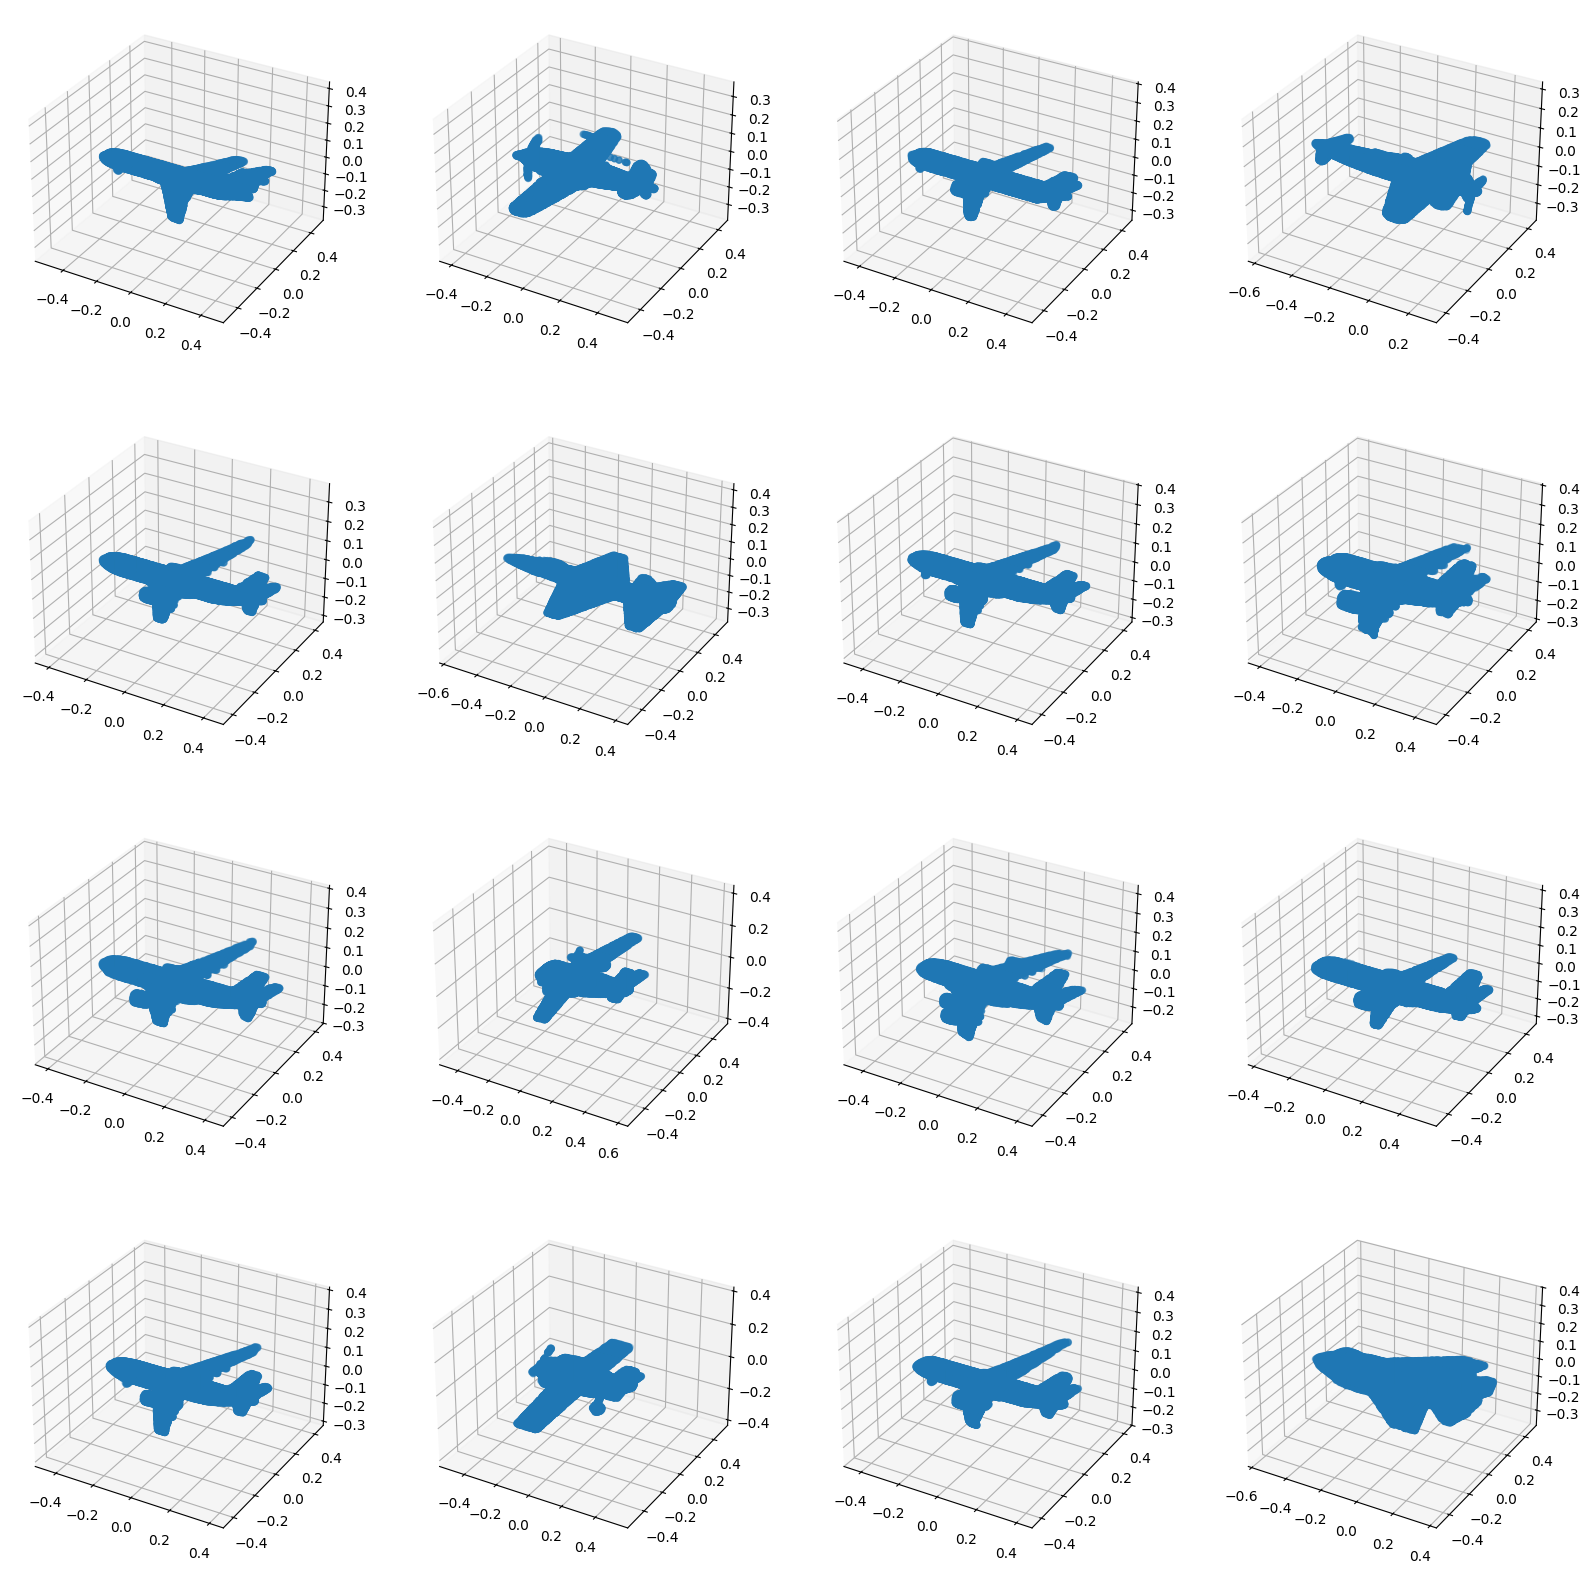

In [5]:
# plot the last point cloud in generated_samples in a 5 by 2 grid:
# 
fig = plt.figure(figsize=(20, 20)) 
for ind in range(16):
    ax = fig.add_subplot(4, 4, 1+ind, projection='3d')
    i = np.random.randint(len(pc_train))
    ax.scatter((pc_train)[i][:, 2], -(pc_train)[i][:, 0], (pc_train)[i][:, 1])
    plt.axis('equal')
plt.show()

# Run Wasserstein Flow Matching

In [6]:
FlowMatchingModel = WassersteinFlowMatching(point_clouds = pc_train, wasserstein_eps = 0.01, wasserstein_lse = False, num_sinkhorn_iters = 100)

Initializing WassersteinFlowMatching
Using row_iter map with 100 iterations and 0.01 epsilon
Chamfer Mini-Batch


Show source noise samples

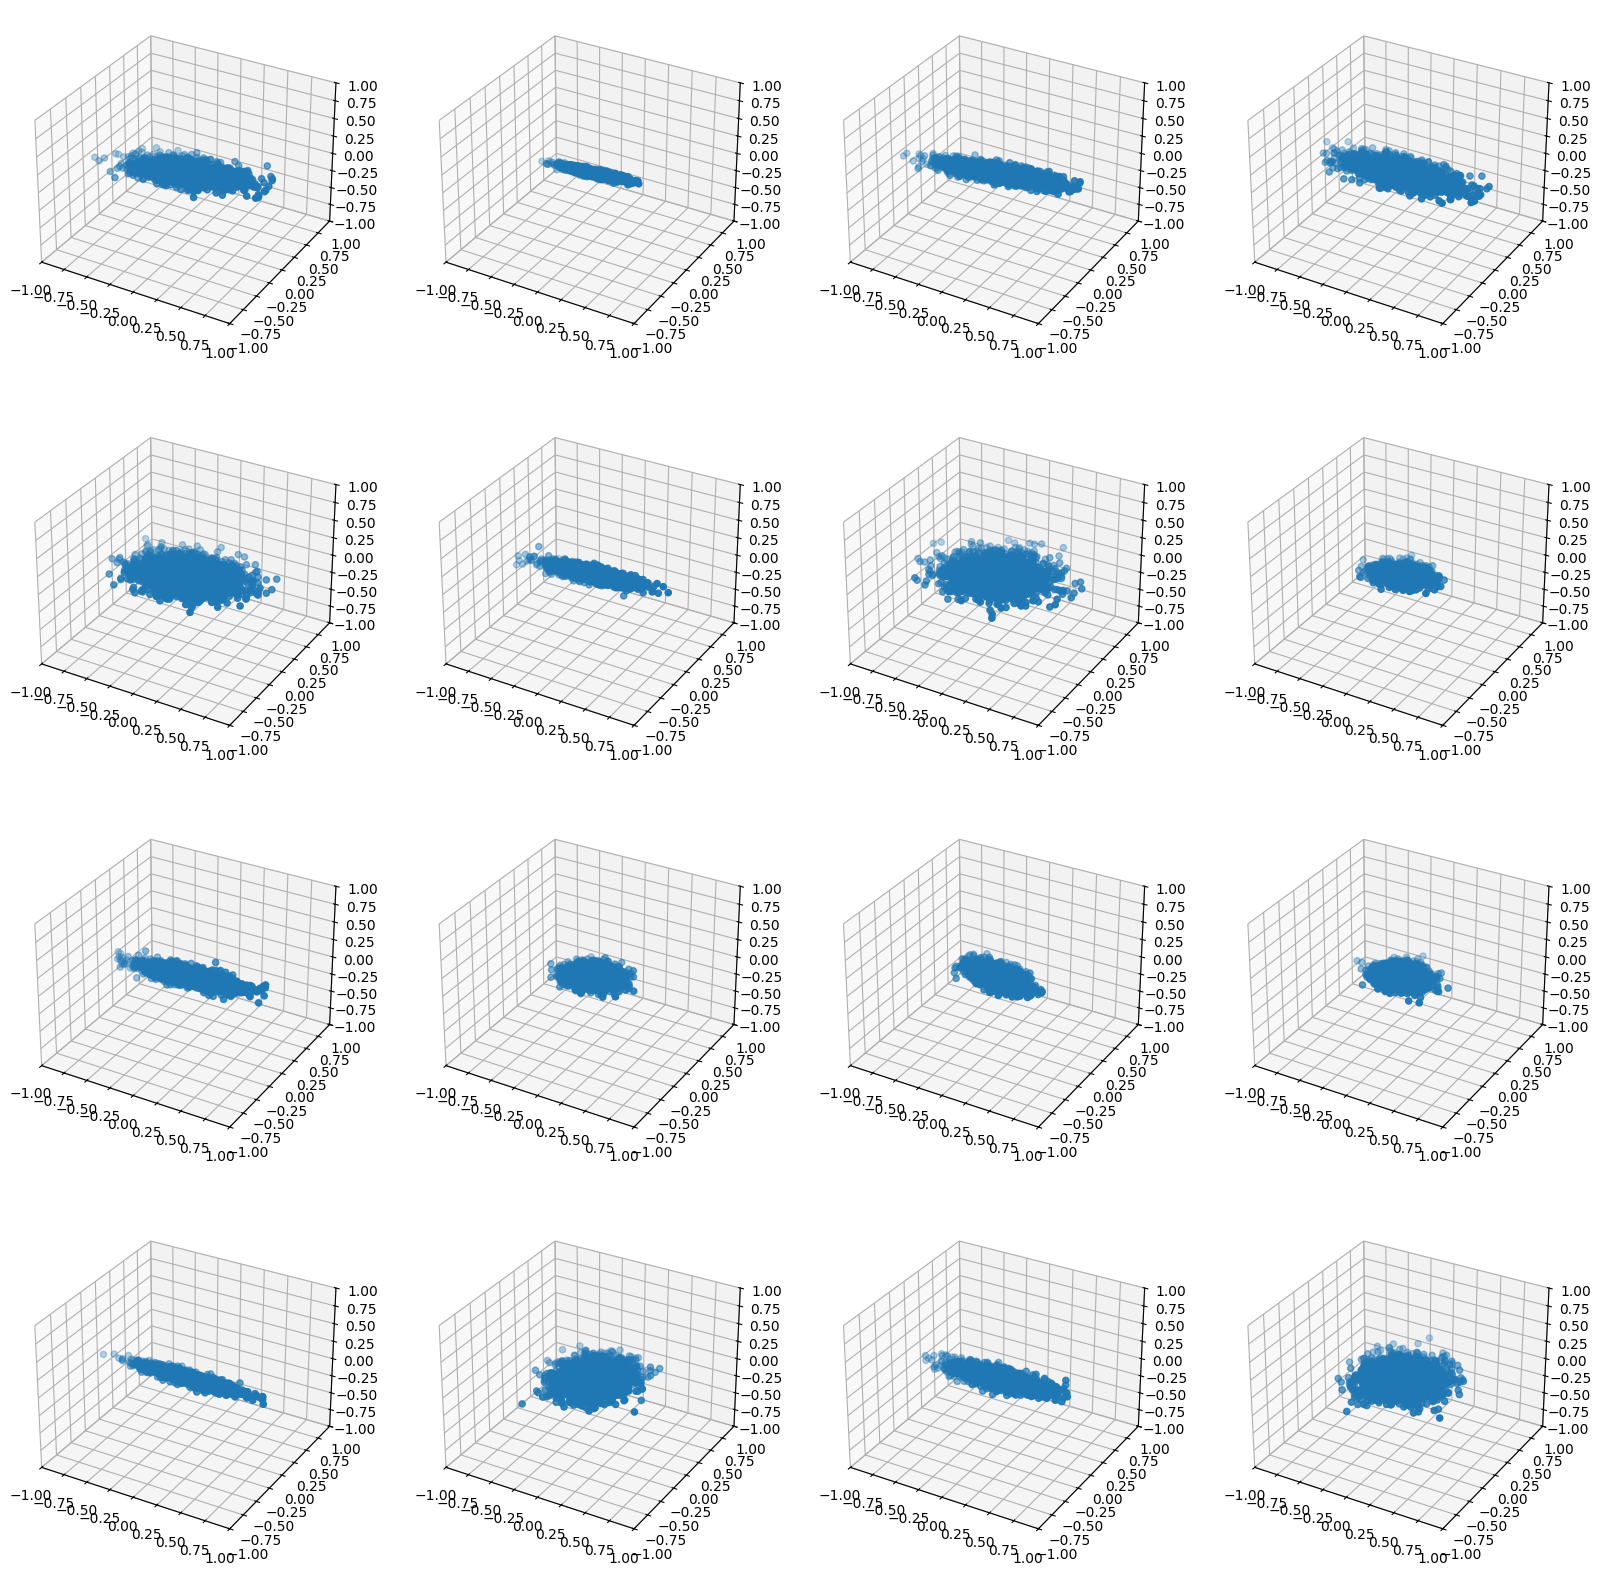

In [7]:

noise_samples = FlowMatchingModel.noise_func(size = [16, 2000, 3], noise_config = FlowMatchingModel.noise_config, key = jax.random.key(0))

fig = plt.figure(figsize=(20, 20)) 
for ind in range(16):
    ax = fig.add_subplot(4, 4, 1+ind, projection='3d')
    ax.scatter(noise_samples[ind][:, 2], -noise_samples[ind][:, 0], noise_samples[ind][:, 1])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
plt.show()

Train Model & Plot loss curve

In [ ]:

FlowMatchingModel.train(batch_size = 32, 
                        shape_sample = 2000, 
                        training_steps = 50000, 
                        warmup_steps = 5000)

Sampling 2000 points from each point cloud


  0%|                                                                                                                                                | 0/50000 [00:00<?, ?it/s]

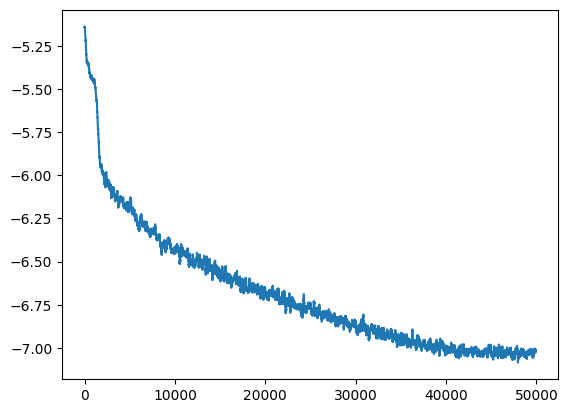

In [9]:
loss_smooth = np.convolve(np.log(FlowMatchingModel.losses), np.ones(100)/100, mode='valid')
plt.plot(loss_smooth)

# Generate Samples

Set Initial Key

In [ ]:
key = jax.random.PRNGKey(0)

Run Flow for 1000 timesteps

In [18]:

subkey,key = jax.random.split(key)
generated_samples, sample_weights = FlowMatchingModel.generate_samples(num_samples = 16,
                                                            size = 2000,
                                                            timesteps = 1000,
                                                            key = subkey)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.73it/s]


Plot resulting point clouds

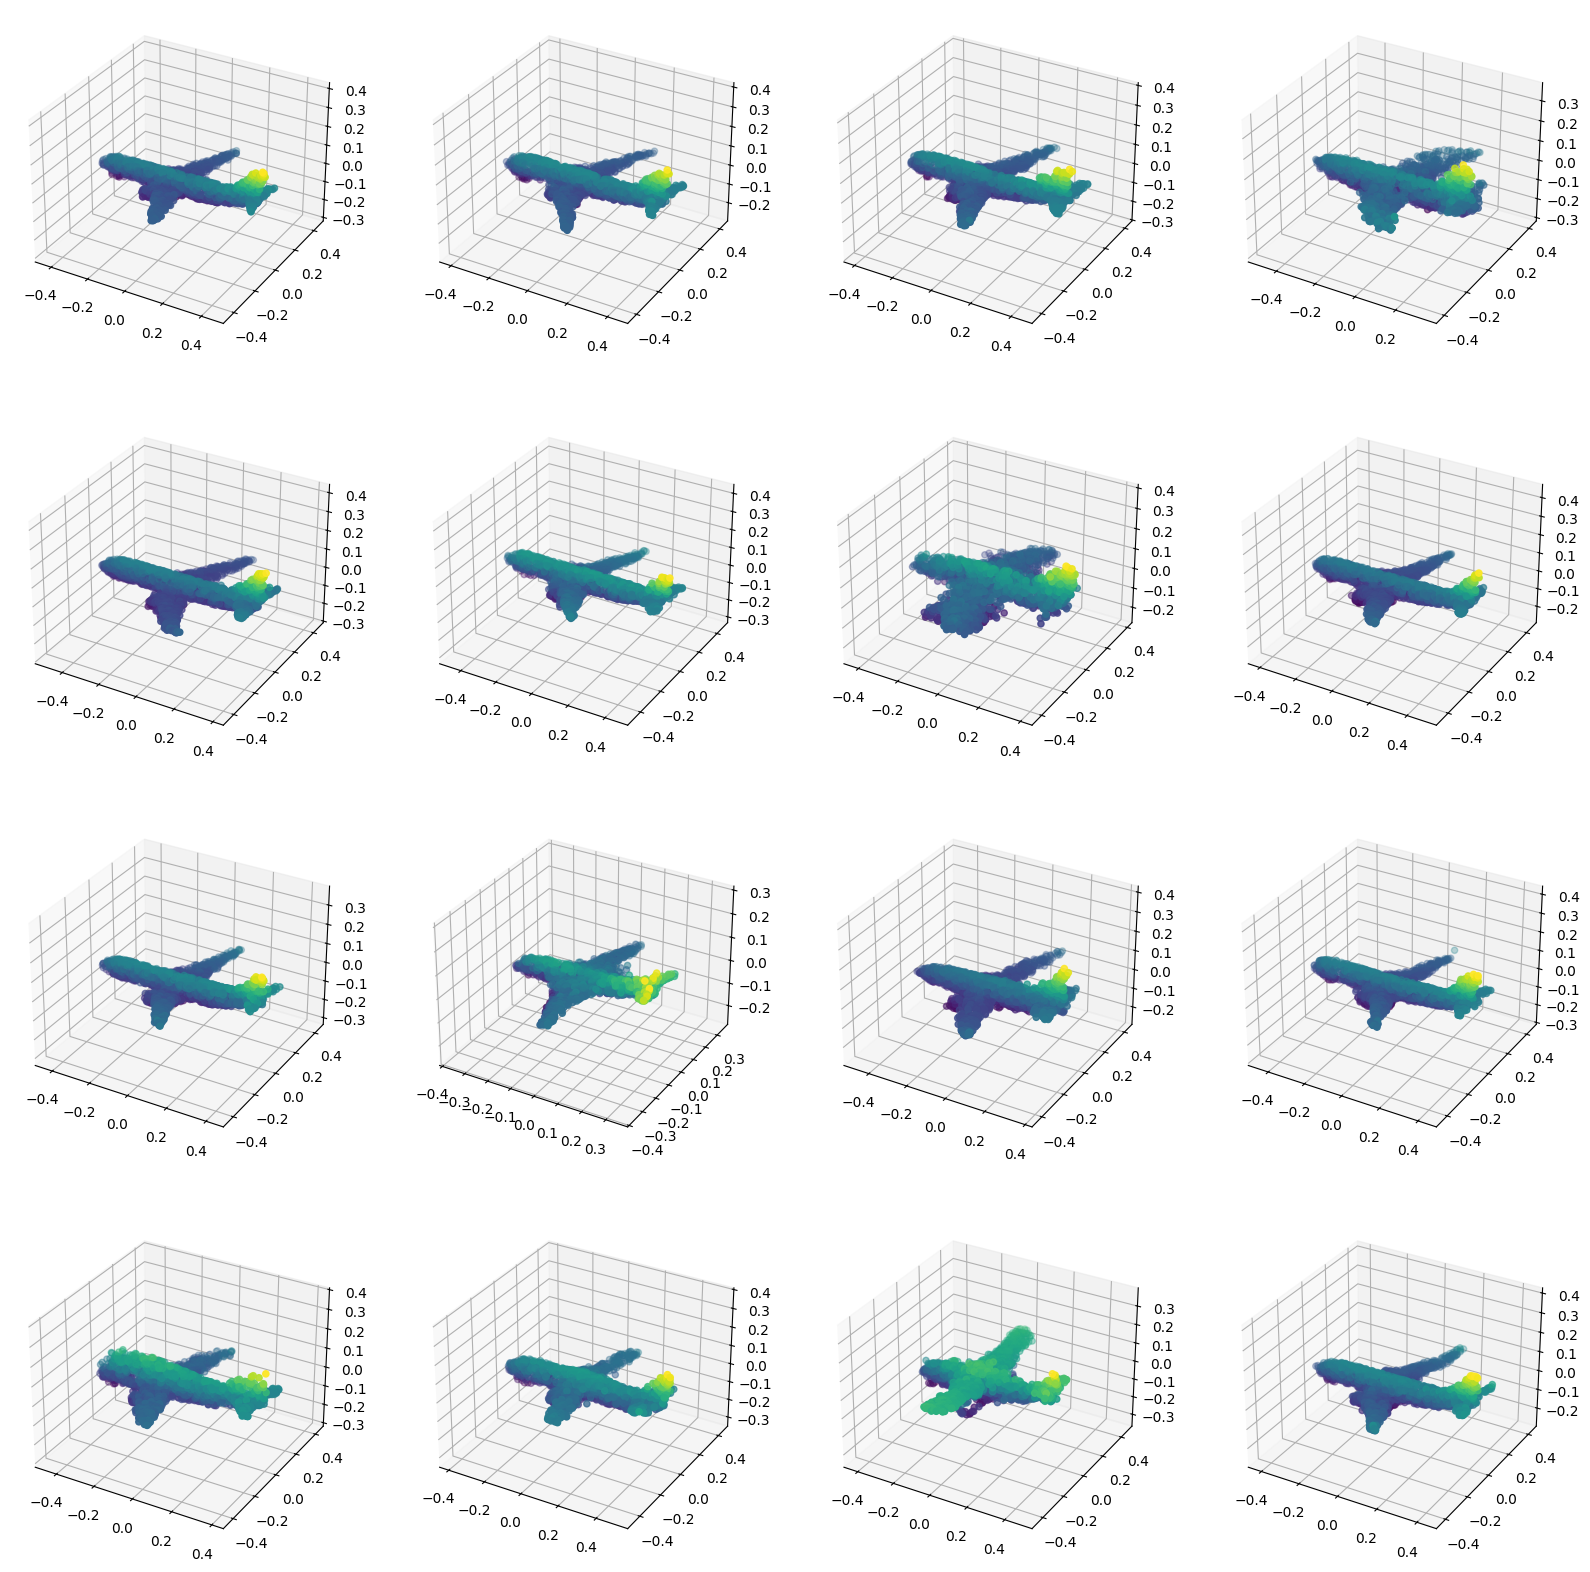

In [19]:
fig = plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = fig.add_subplot(4,4, 1+i, projection='3d')
    ax.scatter(generated_samples[-1][i][:, 2], - generated_samples[-1][i][:, 0],  generated_samples[-1][i][:, 1], c = generated_samples[-1][i][:, 1])
    ax.axis('equal')
plt.show()